In [239]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
import math
import pydot
from IPython.display import Image, display

FREEZE_DIR = '/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm'
MULTIOMICS_MANIFEST_EXTRACTED = 'multiomics/GECOPD/ANNOTATED_MANIFEST.csv'
MULTIOMICS_CDATA_EXTRACTED = 'multiomics/GECOPD/c_data.build_sample_groups'
MULTIOMICS_MANIFEST_PLATE103 = 'multiomics/GECOPD.1/ANNOTATED_MANIFEST.csv'

os.chdir(FREEZE_DIR)

In [240]:
annotated_manifest = pd.read_csv(MULTIOMICS_MANIFEST_EXTRACTED)
annotated_manifest

,Unnamed: 0,SampleLabel,S_SAMPLEID_manifest,SampleAlias,SampleTypeCode,dataset_id,is_reference,S_SUBJECTID,S_SAMPLEID,S_SUBJECTID_sample,S_STUDYID,ALIASTYPE,ALIASID,ExpectedGender,ObservedGender,flags,group_id,keep_drop,status
0,0,NWD100018,NaN,NWD100018,d,0,0,ST-01000557,S-001174464,ST-01000557,GECOPD,Pheno Id,24516P,M,M,NaN,7231,keep,pass
1,1,NWD100059,NaN,NWD100059,d,0,0,ST-00033813,S-000554104,ST-00033813,GECOPD,Pheno Id,17041D,M,F,gender_mismatch;cross_subject_match;unexpected...,1142,drop,review_cross_subject_matches
2,2,NWD100095,NaN,NWD100095,d,0,0,ST-00075744,S-000964706,ST-00075744,GECOPD,Pheno Id,11401D,F,F,NaN,3424,keep,pass
3,3,NWD100109,NaN,NWD100109,d,0,0,ST-00078957,S-001558939,ST-00078957,GECOPD,Pheno Id,19457S,F,F,NaN,6605,keep,pass
4,4,NWD100230,NaN,NWD100230,d,0,0,ST-00077474,S-001557255,ST-00077474,GECOPD,Pheno Id,12392H,F,F,NaN,5133,keep,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38351,38351,S-001648320_CCAAGTCT-AAGGATGA_L002_accepted_hi...,S-001648320,S-001648320_CCAAGTCT-AAGGATGA_L002_accepted_hi...,r,4,0,ST-00077934,S-001648320,ST-00077934,GECOPD,Pheno Id,19433E,M,M,NaN,5586,keep,pass
38352,38352,S-001648321_TGGATCGA-GTGCGATA_L001_accepted_hi...,S-001648321,S-001648321_TGGATCGA-GTGCGATA_L001_accepted_hi...,r,4,0,ST-01003372,S-001648321,ST-01003372,GECOPD,Pheno Id,24728E,M,M,NaN,8538,keep,pass
38353,38353,S-001648322_GGACTTGG-CGCAGACG_L001_accepted_hi...,S-001648322,S-001648322_GGACTTGG-CGCAGACG_L001_accepted_hi...,r,4,0,ST-01005041,S-001648322,ST-01005041,GECOPD,Pheno Id,23798U,M,M,NaN,8825,keep,pass
38354,38354,S-001648323_TTGGACTC-GGAAGCAG_L002_accepted_hi...,S-001648323,S-001648323_TTGGACTC-GGAAGCAG_L002_accepted_hi...,r,4,0,ST-01007265,S-001648323,ST-01007265,GECOPD,Pheno Id,25389N,M,M,NaN,9917,keep,pass


In [4]:
## multiomics_manifest_plate103 = pd.read_csv(MULTIOMICS_MANIFEST_PLATE103)
## multiomics_manifest_plate103

/udd/rejpz/.conda/envs/cdnm-jupyter-python-3.7.6/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (8,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,SampleLabel,S_SAMPLEID_manifest,SampleAlias,SampleTypeCode,dataset_id,is_reference,S_SUBJECTID,S_SAMPLEID,S_SUBJECTID_sample,S_STUDYID,ALIASTYPE,ALIASID,ExpectedGender,ObservedGender,flags,group_id,keep_drop,status
0,0,NWD100018,NaN,NWD100018,d,0,0,ST-01000557,S-001174464,NaN,NaN,NaN,NaN,M,M,;cross_subject_match,21616,drop,review_cross_subject_matches
1,1,NWD100059,NaN,NWD100059,d,0,0,ST-00033813,S-000554104,NaN,NaN,NaN,NaN,M,U,gender_mismatch;observed_gender_indeterminate;...,1530,drop,review_cross_subject_matches
2,2,NWD100095,NaN,NWD100095,d,0,0,ST-00075744,S-000964706,NaN,NaN,NaN,NaN,F,F,NaN,3812,keep,pass_isolate
3,3,NWD100109,NaN,NWD100109,d,0,0,ST-00078957,S-001558939,NaN,NaN,NaN,NaN,F,U,gender_mismatch;observed_gender_indeterminate;...,11430,drop,review_cross_subject_matches
4,4,NWD100230,NaN,NWD100230,d,0,0,ST-00077474,S-001557255,NaN,NaN,NaN,NaN,F,U,gender_mismatch;observed_gender_indeterminate;...,16185,drop,review_cross_subject_matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33578,33578,308234,NaN,308234,r,3,0,308234,NaN,NaN,NaN,NaN,NaN,NaN,M,gender_mismatch,381,review,review_gender_mismatch
33579,33579,308236,NaN,308236,r,3,0,308236,NaN,NaN,NaN,NaN,NaN,NaN,M,gender_mismatch,382,review,review_gender_mismatch
33580,33580,308238,NaN,308238,r,3,0,308238,NaN,NaN,NaN,NaN,NaN,NaN,M,gender_mismatch,383,review,review_gender_mismatch
33581,33581,308240,NaN,308240,r,3,0,308240,NaN,NaN,NaN,NaN,NaN,NaN,M,gender_mismatch,384,review,review_gender_mismatch


In [5]:
## How many of those are TOEs
# methylation_samples = multiomics_manifest_plate103[multiomics_manifest_plate103['SampleTypeCode'] == 'm']
methylation_samples = multiomics_manifest_extracted[multiomics_manifest_extracted['dataset_id'] == 2]
methylation_samples

,Unnamed: 0,SampleLabel,S_SAMPLEID_manifest,SampleAlias,SampleTypeCode,dataset_id,is_reference,S_SUBJECTID,S_SAMPLEID,S_SUBJECTID_sample,S_STUDYID,ALIASTYPE,ALIASID,ExpectedGender,ObservedGender,flags,group_id,keep_drop,status
20815,20815,TOE352133_203866300093_R08C01_369509,S-001784728,TOE352133,m,2,0,ST-00078850,S-001784728,ST-00078850,GECOPD,Pheno Id,16107C,F,F,NaN,11602,review,review-unknown
20816,20816,TOE752712_203824840029_R04C01_354654,S-001773897,TOE752712,m,2,0,ST-00077184,S-001773897,ST-00077184,GECOPD,Pheno Id,18383K,F,F,NaN,9958,keep,pass
20817,20817,TOE386360_203991530007_R07C01_358160,S-001735832,TOE386360,m,2,0,ST-00037131,S-001735832,ST-00037131,GECOPD,Pheno Id,13046T,F,NaN,observed_gender_missing;unexpected_geno_nomatch,14009,drop,review_cross_subject_matches
20818,20818,TOE440084_204234730121_R06C01_379130,S-001151788,TOE440084,m,2,0,ST-00074756,S-001151788,ST-00074756,GECOPD,Pheno Id,19282J,M,NaN,observed_gender_missing,7548,review,review-unknown
20819,20819,TOE768283_203511880065_R06C01_337519,S-001762055,TOE768283,m,2,0,ST-01004933,S-001762055,ST-01004933,GECOPD,Pheno Id,23123R,M,NaN,observed_gender_missing,13824,review,review-unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33243,33243,TOE953811_203866300008_R08C01_369260,S-001036932,TOE953811,m,2,0,ST-01005184,S-001036932,ST-01005184,GECOPD,Pheno Id,23860Z,F,NaN,observed_gender_missing,14072,review,review-unknown
33244,33244,TOE936294_203991470162_R03C01_376291,S-001593138,TOE936294,m,2,0,ST-01005342,S-001593138,ST-01005342,GECOPD,Pheno Id,22750N,F,NaN,observed_gender_missing,14228,review,review-unknown
33245,33245,TOE501153_203675380106_R07C01_353591,S-001782924,TOE501153,m,2,0,ST-01001573,S-001782924,ST-01001573,GECOPD,Pheno Id,21350S,M,NaN,observed_gender_missing,12614,review,review-unknown
33246,33246,TOE502474_203829800079_R02C01_355638,S-000544262,TOE502474,m,2,0,ST-00034988,S-000544262,ST-00034988,GECOPD,Pheno Id,13862X,M,NaN,observed_gender_missing,6335,review,review-unknown


In [6]:
methylation_samples.groupby('status').size()

status
pass                              558
pass_isolate                        1
review-unknown                  11400
review_cross_subject_matches      416
review_gender_mismatch             26
review_unmatched_sample            32
dtype: int64

In [7]:
gender_from_850K = pd.read_csv('/proj/regeps/regep00/studies/COPDGene/data/epigenetic/methylation/TopMed/data/freezes/20200706/resiq/LEVEL2/estimated_sex.csv')
gender_from_850K

,Unnamed: 0,xMed,yMed,predictedSex
0,TOE709923_203836210117_R06C01_358588,12.829659,12.999279,M
1,TOE860782_203866300010_R01C01_337285,12.981773,8.954078,F
2,TOE274760_204237140009_R01C01_381691,12.188795,12.433060,M
3,TOE891144_204234660010_R07C01_379384,12.643903,12.971110,M
4,TOE577929_203695310016_R02C01_346357,13.076951,9.114335,F
...,...,...,...,...
1995,TOE999274_203833040031_R07C01_354933,12.759562,13.168514,M
1996,TOE436209_203867050103_R03C01_364231,12.829299,8.837014,F
1997,TOE352133_203866300093_R08C01_369509,13.037925,9.126773,F
1998,TOE134623_203866300061_R08C01_369430,13.051661,9.073152,F


In [5]:
c_data = pd.read_csv(MULTIOMICS_CDATA_EXTRACTED)
c_data

,Unnamed: 0,ID1,ID2,attempted,expected,observed,Concord
0,0,NWD162119,17084V,1,0,1,1.0000
1,1,NWD162119,TOE778016_203991470109_R03C01_376437,1,0,1,1.0000
2,2,NWD162119,S-001587772_CGCTCATT-TATAGCCT_L003_accepted_hi...,1,0,1,0.2388
3,3,17084V,NWD162119,1,0,1,1.0000
4,4,17084V,TOE778016_203991470109_R03C01_376437,0,1,0,NaN
...,...,...,...,...,...,...,...
214727,214727,NWD828499,S-001637908_accepted_hits.sorted.bam,1,1,1,0.3021
214728,214728,TOE221772_203724130012_R08C01_346053,NWD828499,1,1,1,1.0000
214729,214729,TOE221772_203724130012_R08C01_346053,S-001637908_accepted_hits.sorted.bam,0,1,0,NaN
214730,214730,S-001637908_accepted_hits.sorted.bam,NWD828499,1,1,1,0.3021


In [273]:

def set_node_label(row):
    alias = row.SampleAlias
    if len(alias) > 10:
        alias = alias[:10]
    return f'{alias}\n{row.status}'

SEX_COLOR_LOOKUP = {'M': 'royalblue', 'F': 'forestgreen'}

class GenerateGraph:
    # initialize object with manifest data and cdata
    def __init__(self, manifest_df, cdata_df):
        self.df = manifest_df
        self.dfc = cdata_df
        self.node_mappings = { 
            "ObservedGender": { "F": "circle", "M": "square", "U": "star", "nan": "star" },
            "SampleLabel":    { "Number": "square", "NWD": "hexagon", "TOE": "triangle" },
            "SampleAlias":    { "Number": "square", "NWD": "hexagon", "TOE": "triangle" },
            "SampleTypeCode": {
                "d": "square", "m": "circle", "r": "hexagon"
            },
            "dataset_id":     { "tmp0": "square", "tmp1": "diamond", "tmp2": "triangle", "tmp3": "circle" },
            "S_SAMPLEID":    { "tmp0": "square", "tmp1": "diamond", "tmp2": "triangle", "tmp3": "circle" }
        }
        self.mapping_funcs = {
            "ObservedGender": lambda x: x,
            "SampleLabel": None,
            "SampleAlias": None,
            "SampleTypeCode": lambda x: x,
            "dataset_id": None,
            "S_SAMPLEID": lambda x: x[0:3] + x[4]
        }
    
    # method to call to generate graph
    def graph(self, group_id, shape_by):
        # filtering by group_id
        query_groupid = f'group_id == {group_id}'
        df_filter_groupid = self.df.query(query_groupid)
        df_filter_groupid['NodeLabel'] = df_filter_groupid.apply(set_node_label, axis=1)
        
        # get nodes
        nodes = df_filter_groupid["SampleLabel"].values
        
        # group nodes by shape mappings
        shape_nodes = [] #self.map_nodes(df_filter_groupid, shape_by)

        # getting all combinations of samplelabels
        #edges, labels = self.generate_edges(nodes)
        edges = labels = []
        
        return self.generate_graph(shape_nodes, edges, labels, group_id, shape_by, df_filter_groupid)
        
    def generate_graph(self, shape_nodes, edges, labels, groupid, shape_by, df_filter_groupid):
        
        ### Get the list of subject ids and set colors for subjects
        subjects = list(set(df_filter_groupid["S_SUBJECTID"].values))
        
        # create graph
        G = pydot.Dot('tmp/graph_path.png', graph_type="graph", compound='true', fontname='Verdana')
        
        # create legend
        # print(f'{subjects}')
        ## node = pydot.Node(shape_nodes[node_shape]["attribute"], shape=node_shape, style="filled", fillcolor="lightblue")
        
        ### process concordance data into edges
        nodes = list(df_filter_groupid['SampleLabel'].values)
        all_edges = list(combinations(nodes, 2))
        
        for edge in all_edges:
            query_string = f'ID1 == "{edge[0]}" and ID2 == "{edge[1]}"'
            
            try:
                c_record = self.dfc.query(query_string)
                concord = c_record["Concord"].values[0]
                expected = c_record['expected'].values[0]
                attempted = c_record['attempted'].values[0]
                observed = c_record['observed'].values[0]
                # only create edge for pairs that have concord values
                if not math.isnan(concord):
                    if not expected:
                        color = 'darkgoldenrod2'
                        style = 'solid,setlinewidth(4)'
                    else:
                        color = 'black'
                        style = 'solid'
                    label = concord
                    new_edge = pydot.Edge(edge[0], edge[1], label=label, color=color, style=style)
                    G.add_edge(new_edge)
                elif (attempted and expected) and not observed:
                    color = 'gray'
                    style = 'dotted'
                    new_edge = pydot.Edge(edge[0], edge[1], color=color, style=style)
                    G.add_edge(new_edge)
                    
            except Exception as e:
                pass
        
        ### Process each sample into a node
        for (s, subject) in enumerate(subjects):

            # add nodes
            samples = df_filter_groupid[df_filter_groupid.S_SUBJECTID == subject]
            cluster = pydot.Cluster(graph_name=subject, label=f"{subject}\n{samples.iloc[0].ALIASID}", 
                                   fontsize="10", style="bold", fillcolor="white",
                                   color=SEX_COLOR_LOOKUP.get(samples.iloc[0].ExpectedGender, 'gray'))
            ## print(f'{subject}: {samples}')
            fill = s + 1
            for (s_idx, sample) in samples.iterrows():
                node_label = f'{sample.NodeLabel}'
                sample_label = sample.SampleLabel
                shape = self.node_mappings['SampleTypeCode'][sample.SampleTypeCode]
                
                c_data_query_string = f'(ID1 == "{sample_label}") or (ID2 == "{sample_label}")'
                c_records = self.dfc.query(c_data_query_string)
                c_records = c_records[c_records['Concord'].notna()]
                c_records = c_records[c_records['expected'] == 0]
                if c_records.size > 0:
                    color = 'darkgoldenrod2'
                    style = 'filled,setlinewidth(6)'
                else:
                    color = 'black' # SEX_COLOR_LOOKUP.get(sample.ObservedGender, 'gray')
                    style = 'filled,setlinewidth(2)'
                fillcolor = SEX_COLOR_LOOKUP.get(sample.ObservedGender, 'gray')
                node = pydot.Node(sample_label, label=node_label, shape=shape, style=style, color=color, fillcolor=fillcolor)
                cluster.add_node(node)

            G.add_subgraph(cluster)
        
        #G.create_png(graph_path)
        return G.create_png()
            
    # returns a dictionary with nodes grouped by shape such as { "shape": { "nodes": [nodes], "attribute": "attr" }... }
    # given a list of nodes
    def map_nodes(self, n, by):
        shape_nodes = {}
        
        try:
            curr_map = self.node_mappings[by]
        except Exception:
            raise Exception(f"shape_by is not a valid option! ({self.node_mappings.keys()})")
        
        for (node_index, node) in n.iterrows():
            # get attribute for node
            node_label = node['SampleLabel']
            query_string = f'SampleLabel == "{node}"'
            
            # cast to String for nan case
            #attr = str(self.df.query(query_string)[by].values[0])
            attr = node_label

            # get final attribute String
            # will not throw exception because of try except above
            # final_attr = self.mapping_funcs[by](attr)
            final_attr = 'SampleLabel'
            
            # get mapped shape
            # shape = curr_map[final_attr]
            shape = 'circle'

            shape_nodes.setdefault(shape, {"nodes": [], "attribute": final_attr})
            shape_nodes[shape]["nodes"].append(node)
                
        return shape_nodes
    


In [274]:
graph_generator = GenerateGraph(annotated_manifest, c_data)

/d/tmp/rejpz/ipykernel_4049/354022813.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_groupid['NodeLabel'] = df_filter_groupid.apply(set_node_label, axis=1)


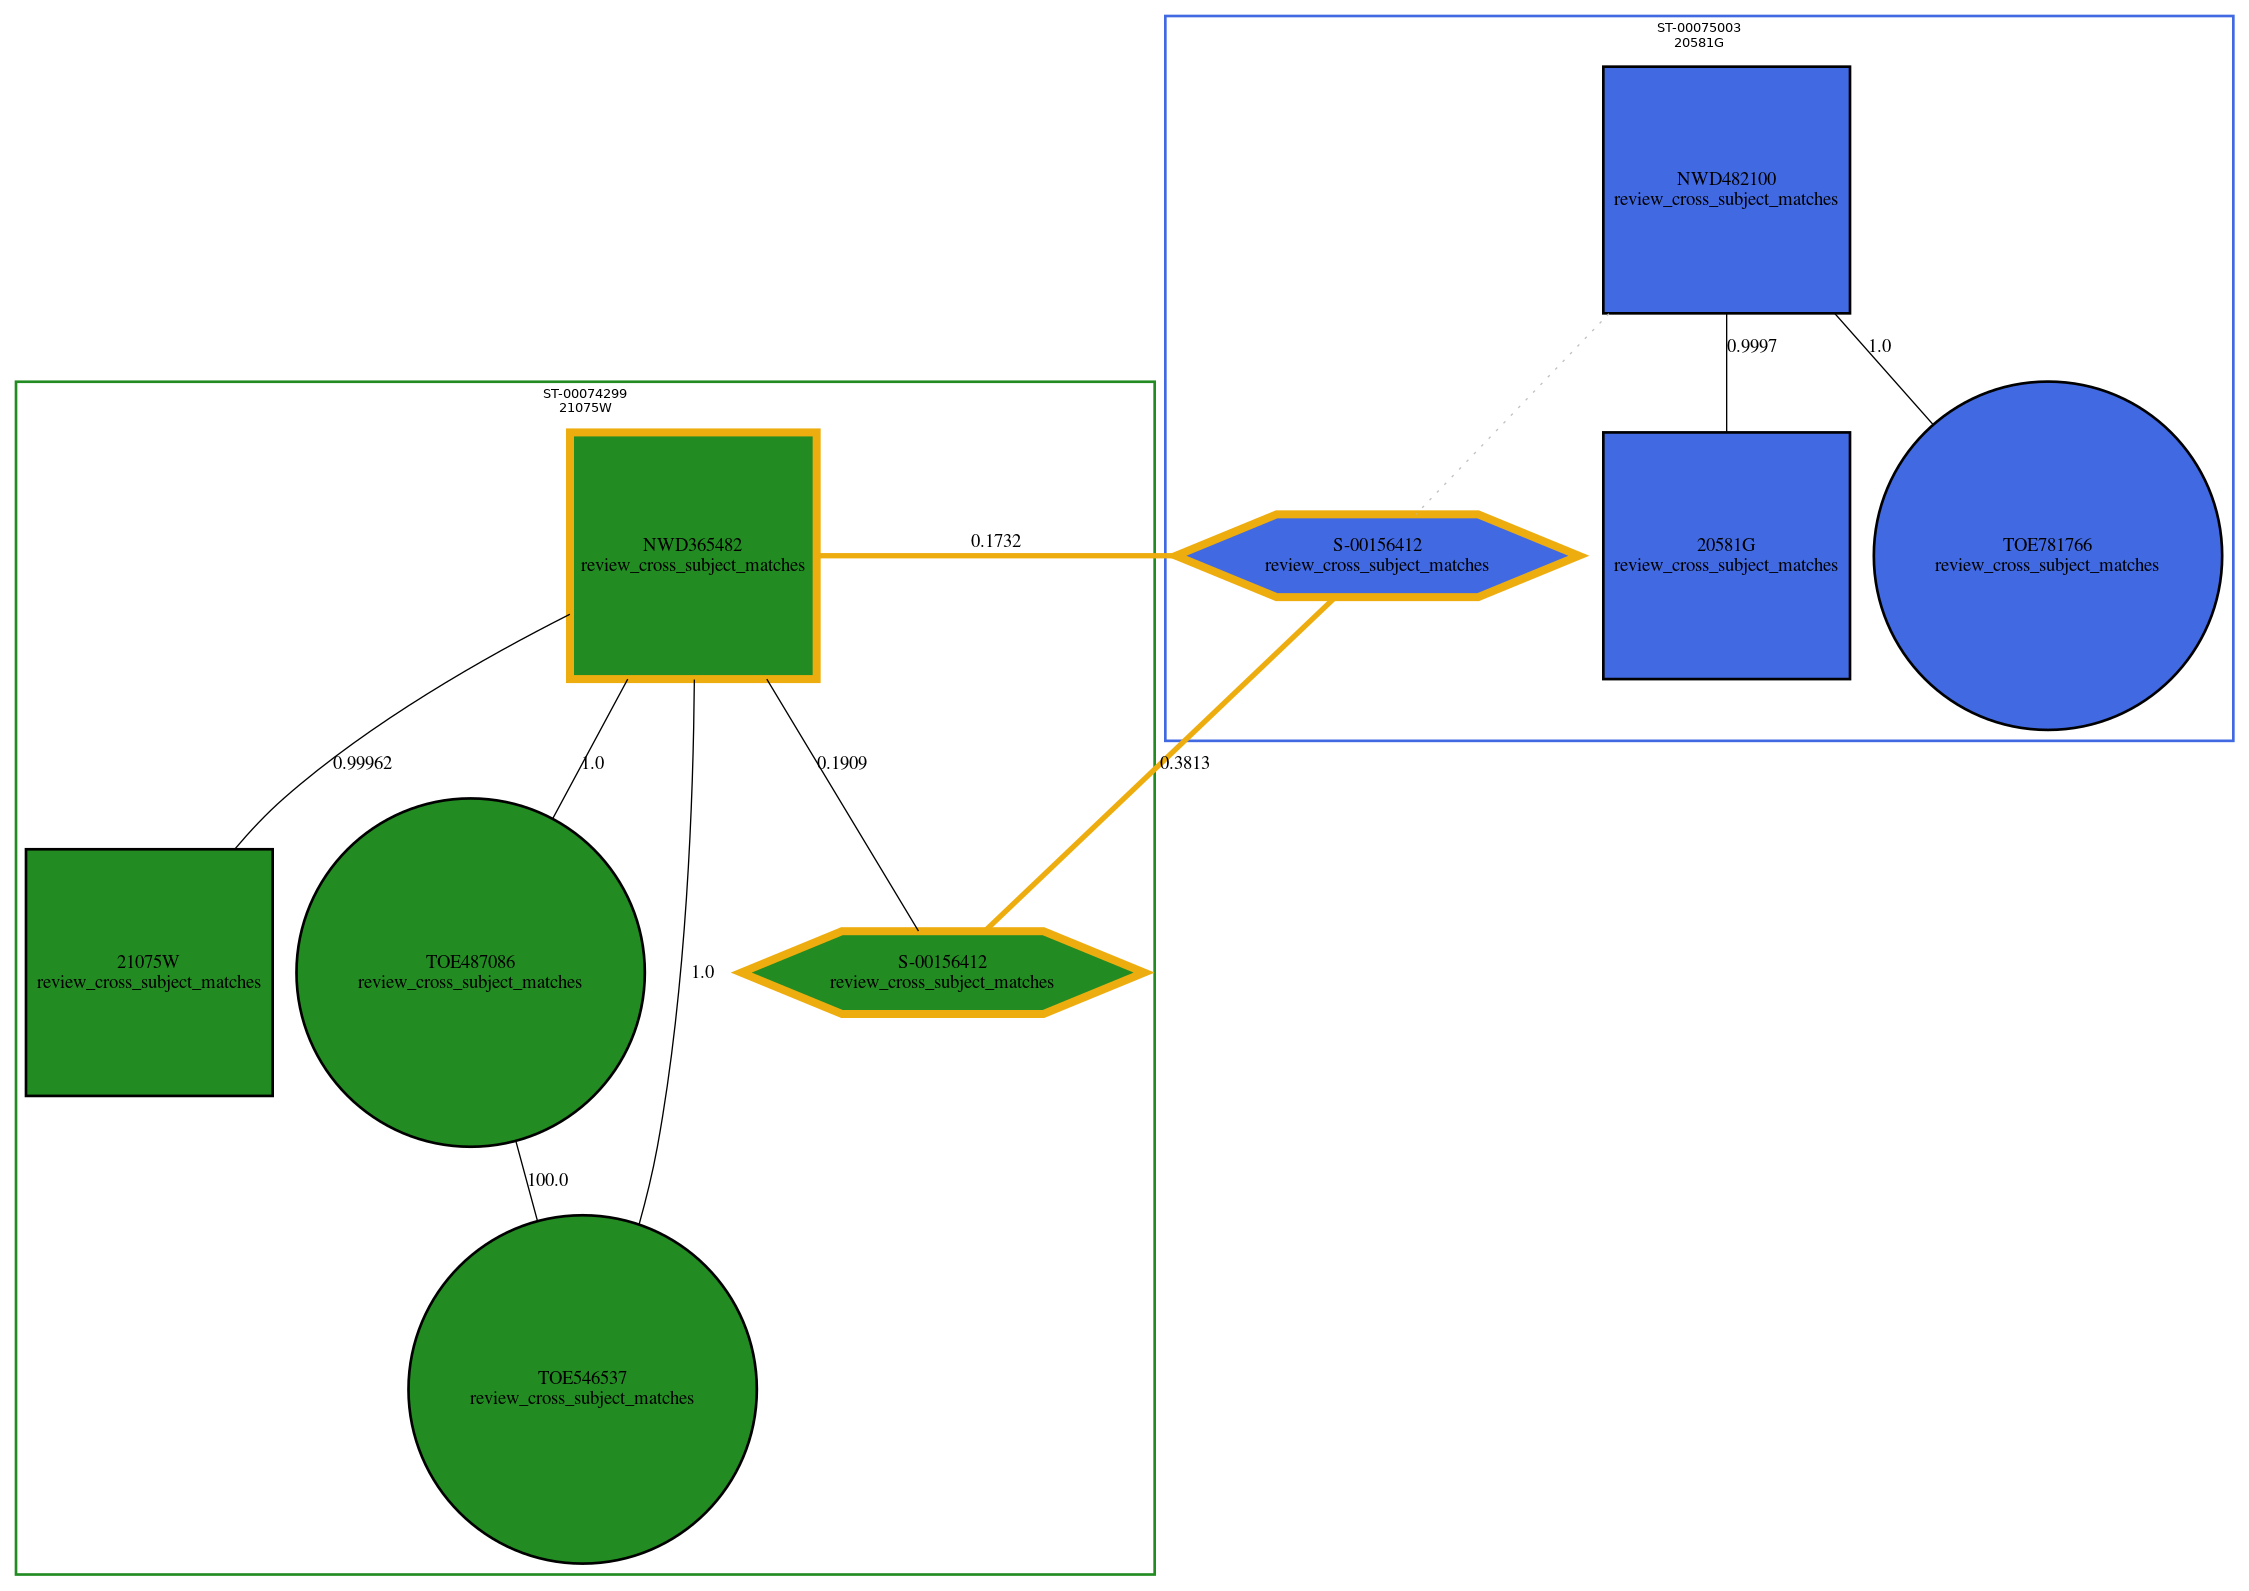

In [284]:
from IPython.display import Image, display

group_id = annotated_manifest[annotated_manifest['SampleAlias'] == 'TOE881059'].reset_index()['group_id'][0]
## group_id = 1661 # 1661 shows how bad some of the rna samples really are
## group_id = 1495 # 1495 all samples are the same -- 2 subjects are the same!
group_id = 1988 #8133? (254 members)
pdot = graph_generator.graph(group_id, shape_by='SampleTypeCode')
image = Image(pdot)
display(image)


In [11]:
group_id = multiomics_manifest_extracted[multiomics_manifest_extracted['SampleAlias'] == 'TOE881059'].reset_index()['group_id'][0]
group_id

6496

In [ ]:
glob.glob('tmp/batch_*.csv')

In [ ]:
batch_12 = pd.read_csv('tmp/batch_12_170209_7001411_0477_ACA366ANXX_king.csv')
plt.hist(batch_12['Kinship'], bins=50)

/d/tmp/rejpz/ipykernel_4049/3981532978.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_groupid['NodeLabel'] = df_filter_groupid.apply(set_node_label, axis=1)


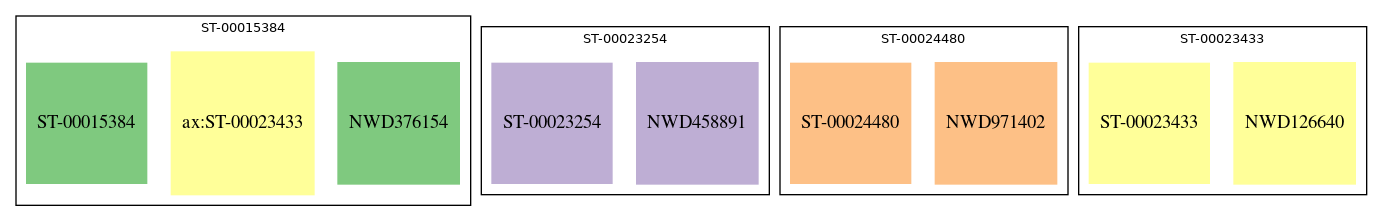

In [17]:
GLAXO_MULTIOMICS_MANIFEST_EXTRACTED = 'multiomics/GLAXO/ANNOTATED_MANIFEST.csv'
GLAXO_MULTIOMICS_CDATA_EXTRACTED = 'multiomics/GECOPD/c_data.build_sample_groups'

glaxo_multiomics_manifest_extracted = pd.read_csv(GLAXO_MULTIOMICS_MANIFEST_EXTRACTED)
glaxo_c_data = pd.read_csv(GLAXO_MULTIOMICS_CDATA_EXTRACTED)

glaxo_graph_generator = GenerateGraph(glaxo_multiomics_manifest_extracted, glaxo_c_data)
group_id = glaxo_multiomics_manifest_extracted[glaxo_multiomics_manifest_extracted['SampleAlias'] == 'NWD126640'].reset_index()['group_id'][0]

pdot = glaxo_graph_generator.graph(group_id, shape_by='SampleTypeCode')
image = Image(pdot)
display(image)
